# KNN算法的学习

KNN的英文叫K-Nearest Neighbor，比较简单

### 一、简单的例子

首先我们先从一个简单的例子入手，来体会一下KNN算法。

假设，我们想对电影的类型进行分类，统计了电影中打斗的次数、接吻的次数，当然还有其他的指标也可以统计到，这里就不列举了，如下表所示：
<img src="https://static001.geekbang.org/resource/image/6d/87/6dac3a9961e69aa86d80de32bdc00987.png" width=600>

我们很容易的理解《战狼》《红海行动》《碟中谍6》是动作片，《前任三》《春娇救志明》《泰塔尼克号》是爱情片，但是有没有一种办法让机器也可以掌握这个分类的规则呢？当有一部新电影的时候，也可以对它的类型自动分类呢?

这里我们可以把打斗次数看成x轴，接吻次数看成y轴，然后在二维的坐标轴上，对这几部电影进行标记。

如下图所示，对于未知的电影A，坐标为(x)，我们需要看下里离电影A最近的都有哪些电影，这些电影中的大多数属于哪个分类，那么电影A就属于哪个分类。

而在实际操作中，我们还需要确定一个K值，也就是我们需要观察离电影A最近的电影有多少个。
<img src="https://static001.geekbang.org/resource/image/fa/cc/fa0aa02dae219b21de5984371950c3cc.png" width=500>

###### 代码实现

In [1]:
# 导入包
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# film_train_data表示电影数据 film_train_labels表示标签
film_data =[[100,5],
            [95,3],
            [105,31],
            [2,59],
            [3,60],
            [10,80]]
film_labels = [0,0,0,1,1,1]

film_train_data = np.array(film_data)
film_train_labels = np.array(film_labels)

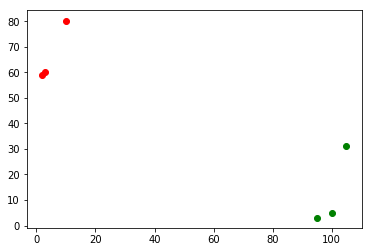

In [3]:
# 在图中展示
plt.scatter(film_train_data[film_train_labels==0,0],film_train_data[film_train_labels==0,1],color="g")

plt.scatter(film_train_data[film_train_labels==1,0],film_train_data[film_train_labels==1,1],color="r")

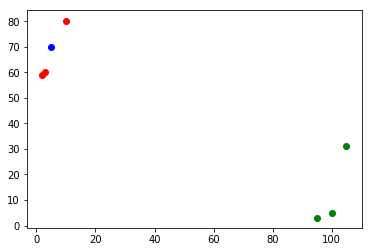

In [4]:
# 添加电影A
film_data_A = np.array([5,70])

# 一并在图中展示
plt.scatter(film_train_data[film_train_labels==0,0],film_train_data[film_train_labels==0,1],color="g")
plt.scatter(film_train_data[film_train_labels==1,0],film_train_data[film_train_labels==1,1],color="r")
plt.scatter(film_data_A[0],film_data_A[1],color="b")

###### KNN的工作原理
“近朱者赤，近墨者黑”可以说是KNN的工作原理。整个计算过程分为三步：

1.计算待分类物体与其他物体之间的距离；

2.统计路基最近的k个邻居

3.对于k个最近的邻居，它们属于哪个分类最多，待分类物体就属于哪一类。

###### KNN的选择

我们能看出整个KNN的分类过程，K值的选择还是很重要的，那么问题来了，K值选择多少是适合的呢？

如果K值比较小，就相当于未分类物体与它的邻居分厂接近才行。这样产生的一个问题就是，如果邻居点是个噪声点，那么未分类物体的分类也会产生误差， 这样KNN分类就会产生过拟合。

如果K值比较大，相当于距离过远的点也会对未知物体的分类产生影响，虽然这种情况的好处是鲁棒性强，但是不足也很明显，会产生欠拟合情况，也就是没有把未分类物体真正分类出来。

所以K值应该是个实践出来的结果，并不是我们事先而定的。在工程上，我们一般采用交叉验证的方式选取K值。

交叉验证的思路就是，把样本集中的大部分样本作为训练集，剩余的小部分样本用于预测，来验证分类模型的准确性。所以在KNN算法中，我们一般会把K值选取在较小的范围内，同时在验证集中准确率最高的那一个最终确定作为K值。

###### 距离如何计算

在KNN算法中，还有一个重要的计算就是关于距离的度量，两个样本点之间的距离代表了这两个样本之间的相似度。距离越大，差异性越大；距离越小，相似度越大。

关于距离的计算方式有下面五种方式：
  
  1.欧式距离；
  
  2.曼哈顿距离；
  
  3.闵可夫斯基距离；
  
  4.切比雪夫距离；
  
  5.余弦距离。

###### 1 欧式距离
欧式距离是我们最常用的距离公式，也叫作欧几里距离。在二维空间中，两点的欧式距离就是：

<img src="https://gss2.bdstatic.com/9fo3dSag_xI4khGkpoWK1HF6hhy/baike/s%3D191/sign=7bb3375e3c4e251fe6f7e0f19687c9c2/e7cd7b899e510fb335a3e2f3d533c895d1430c1f.jpg">


在三维空间中，两点的欧氏距离是：

<img src="https://gss2.bdstatic.com/-fo3dSag_xI4khGkpoWK1HF6hhy/baike/s%3D275/sign=1e062caeb6a1cd1101b675278c13c8b0/ac4bd11373f08202bc7559a147fbfbedaa641b4d.jpg">

同理，我们推出在n维空间中两个点之间的欧式距离是：

<img src="https://gss2.bdstatic.com/9fo3dSag_xI4khGkpoWK1HF6hhy/baike/s%3D469/sign=2bee509a5582b2b7a39f38c208accb0a/ae51f3deb48f8c541e440db136292df5e1fe7f9d.jpg">

###### 2 曼哈顿距离

曼哈顿距离在几何空间中用的比较多，以下图为例，绿色的直线代表两点之间的欧式距离，而红色和黄色的线为两点的曼哈顿距离，所以曼哈顿距离等于两个点在坐标系上绝对轴距总和，用公式表示就是:

###### d( i , j )= | xi - xj | + | yi - yj |

<img src="https://static001.geekbang.org/resource/image/dd/43/dd19ca4f0be3f60b526e9ea0b7d13543.jpg" width=250 height=250>

###### 3 闵可夫斯基距离

闵可夫斯基不是一个距离，而是一组距离的定义。在n位向量空间中a(x11,x12,...,x1n)与b(x21,x22,...,x2n)间的闵可夫斯基距离定义为:

<img src="https://pic002.cnblogs.com/images/2011/63234/2011030823244080.png">

其中p代表空间的维数，当p=1时，就是曼哈顿距离；当p=2时，就是欧式距离；当p->∞，就是切比雪夫距离。

###### 4 切比雪夫距离

切比雪夫距离是怎么计算的呢？两点之间的切比雪夫距离就是这两个点坐标数值差的绝对值的最大值，用数学表示就是：

###### max( | x1 - x2 | , | y1 - y2 | )

###### 5 余弦距离

余弦距离实际上计算的是两个向量的夹角，是在方向上计算两者之间的差异，对绝对值不敏感。在兴趣相关性比较上，角度关系比距离的绝对值更重要，因此余弦距离可以用于衡量用户对内容兴趣的区分度。比如我们用搜索引擎搜索某个关键词，它还会给你推荐其他的相关搜素，这些推荐的关键词就是采用余弦距离计算得出的。

###### KNN的扩展内容

###### a.KD树

其实从上文我们可以看到，KNN的计算过程就是大量计算样本点之间的距离。为了减少计算距离次数，提升KNN的搜素效率，人们提出了KD树(K-dimensional的缩写)。KD树是对数据点在K维空间中划分的一种数据结构。在KD树的构造中，每个节点都是k维数值点的二叉树。既然是二叉树，就可以采用二叉树的增删改查，这样就大大提升了搜索效率。

其实，我们并不需要对KD树的数学原理了解太多，只需要知道它是一个二叉树的数据结构，方便存储K维空间的数据即可，在sklearn我们可以直接调用KD树，很方便。

###### b.KNN做回归

KNN不仅可以做分类，还可以做回归。

首先说下什么是回归。在开头电影这个案例中，如果想要对未知电影进行类型划分，这是一个分类问题。首先看一下要分类的未知电影，离它最近的K部电影大多数属于哪个分类，这部电影就属于哪个分类。

那么如果是一部新电影，已知它是爱情片，想要知道它的打斗次数、接吻次数可能是多少，这就是一个回归问题。

那么KNN如何做回归呢？

对于一个新点，我们需要找出这个点的K个最近邻居，然后将这些邻居的属性的平均值点赋给该点，就可以得到该点的属性。当然不同邻居的影响力权重可以设置不同的。举个例子，比如一部电影A，已知它是动作片，当K=3时，最近的3部电影是《战狼》，《红海行动》和《碟中谍6》，那么它的打斗次数和接吻次数的预估值分别为(100+95+105)/3=100次，(5+3+31)/3=13次

###### KNN的过程

继续刚才那个小例子，首先计算电影A到所有训练电影的距离

In [5]:
from math import sqrt

distance = []
for  film_data in film_train_data:
    d = sqrt(np.sum((film_data_A-film_data)**2))
    distance.append(d)

distance

[115.10864433221339,
 112.2007130102122,
 107.33592129385204,
 11.40175425099138,
 10.198039027185569,
 11.180339887498949]

对其下标进行排序输出

In [6]:
nearest = np.argsort(distance)
nearest

array([4, 5, 3, 2, 1, 0], dtype=int64)

选取k值，这里选取k=3

In [7]:
k = 3

从标签中选取k个最近的标签

In [8]:
topK_labels = [film_train_labels[i] for i in nearest[:k]]
topK_labels

[1, 1, 1]

统计最近的标签的次数

In [9]:
from collections import Counter
votes = Counter(topK_labels)
votes.most_common(1)

[(1, 3)]

输出电影A的预测值

In [10]:
predict_labels = votes.most_common(1)[0][0]
predict_labels

1

###### KNN算法封装

In [11]:
import numpy as np
from math import sqrt
from collections import Counter

def accuracy_score(y_true, y_predict):
    """计算y_true和y_predict之间的准确率"""
    assert len(y_true) == len(y_predict), \
        "the size of y_true must be equal to the size of y_predict"

    return np.sum(y_true == y_predict) / len(y_true)

class KNNClassifier:

    def __init__(self, k):
        """初始化kNN分类器"""
        assert k >= 1, "k must be valid"
        self.k = k
        self._x_train = None
        self._y_train = None

    def fit(self, x_train, y_train):
        """根据训练数据集X_train和y_train训练kNN分类器"""
        assert x_train.shape[0] == y_train.shape[0], \
            "the size of x_train must be equal to the size of y_train"
        assert self.k <= x_train.shape[0], \
            "the size of x_train must be at least k."

        self._x_train = x_train
        self._y_train = y_train
        return self

    def predict(self, x_predict):
        """给定待预测数据集X_predict，返回表示X_predict的结果向量"""
        assert self._x_train is not None and self._y_train is not None, \
                "must fit before predict!"
        assert x_predict.shape[1] == self._x_train.shape[1], \
                "the feature number of x_predict must be equal to x_train"

        y_predict = [self._predict(x) for x in x_predict]
        return np.array(y_predict)

    def _predict(self, x):
        """给定单个待预测数据x，返回x的预测结果值"""
        assert x.shape[0] == self._x_train.shape[1], \
            "the feature number of x must be equal to x_train"

        distances = [sqrt(np.sum((x_train - x) ** 2))
                     for x_train in self._x_train]
        nearest = np.argsort(distances)

        topK_y = [self._y_train[i] for i in nearest[:self.k]]
        votes = Counter(topK_y)

        return votes.most_common(1)[0][0]

    def score(self, x_test, y_test):
        """根据测试数据集 x_test 和 y_test 确定当前模型的准确度"""

        y_predict = self.predict(x_test)
        return accuracy_score(y_test, y_predict)

    def __repr__(self):
        return "KNN(k=%d)" % self.k

调用自己写好的KNN实现上面的小例子

In [12]:
knn_clf = KNNClassifier(k=3)
knn_clf.fit(film_train_data,film_train_labels)
# 将其转换为二维数据
film_data_A = film_data_A.reshape(1,-1)
predict_labels = knn_clf.predict(film_data_A)
predict_labels[0]

1

### 二、使用KNN对鸢尾花数据进行分类识别

In [13]:
# 导包
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

###### 加载鸢尾花数据及对数据的探索

In [14]:
iris = datasets.load_iris()

查看鸢尾花数据的属性

In [15]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

查看对鸢尾花数据的描述

In [16]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

查看鸢尾花数据

In [17]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

查看鸢尾花数据的维度

In [18]:
iris.data.shape

(150, 4)

查看鸢尾花的特征

In [19]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

查看鸢尾花的的标签数据

In [20]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

查看鸢尾花的标签名字

In [21]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

在图中展示鸢尾花数据，先加载鸢尾花前两列的特征

In [22]:
# 加载鸢尾花的前两列数据
data =  iris.data[:,:2]

In [23]:
# 加载鸢尾花的标签数据
labels = iris.target

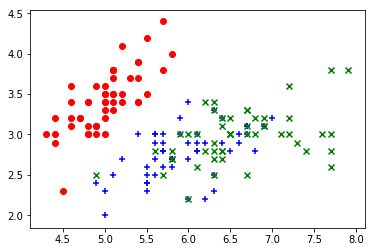

In [24]:
plt.scatter(data[labels==0,0],data[labels==0,1],color="red",marker="o")
plt.scatter(data[labels==1,0],data[labels==1,1],color="blue",marker="+")
plt.scatter(data[labels==2,0],data[labels==2,1],color="green",marker="x")

在图中展示鸢尾花数据，加载鸢尾花后两列的特征

In [25]:
data = iris.data[:,2:]
labels = iris.target

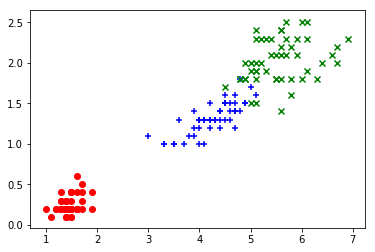

In [26]:
plt.scatter(data[labels==0,0],data[labels==0,1],color="red",marker="o")
plt.scatter(data[labels==1,0],data[labels==1,1],color="blue",marker="+")
plt.scatter(data[labels==2,0],data[labels==2,1],color="green",marker="x")

###### 对数据进行切分

将数据划分为训练数据和测试数据

In [27]:
data = iris.data
shuffle_indexs = np.random.permutation(len(data))
shuffle_indexs

array([ 22,  94, 131,  15,  99,  62,  68,  89, 113, 114, 146, 128, 139,
        38,  50,  95,  70,  91, 123,  49, 138,  57, 117, 136,  58, 132,
        25,  60, 142,  77,  98, 141, 144,  61, 119,  40,  75,  35,   7,
        97,  16, 124,  83, 120,   6, 127,  87,  41,   0, 102, 110,  66,
       107,  84,  29,  18, 101,  21,  72, 121,  33,  14, 115,  63, 147,
        20, 116, 111,  93, 108,  52,  69, 105,  82,  39, 118,  47,  86,
        85, 137,  31,  27,  28, 140, 106,  46, 130,  80,  73,  55,  92,
        19,  88,  10, 112,  24,  36,  78,  65,  79,  74, 143, 129,  71,
       126,   9,  59,  44,   5,  45,  37,   4,  30, 125,  56,  43,  11,
       133,  51, 122, 148,  13,  81, 103, 100, 135,   3,  34,  54,  67,
        26,  53,   1,  90,  48,  32,   8,  76,  12,   2, 145,  23,  42,
       104,  64,  17, 109, 134,  96, 149])

In [28]:
test_ratio = 0.2
test_size = int(len(data)*test_ratio)

In [29]:
test_indexs = shuffle_indexs[:test_size]
train_indexs = shuffle_indexs[test_size:]

x_test = data[test_indexs]
y_test = labels[test_indexs]
x_train = data[train_indexs]
y_train = labels[train_indexs]

print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(30, 4)
(30,)
(120, 4)
(120,)


###### 封装的切割函数

In [30]:
def train_test_split(X,y,test_ratio=0.2,seed=None):
    """将数据X和y按照test_ratio分割成X_train,X_test,y_train,y_test"""
    assert X.shape[0] == y.shape[0],"the size of X must be equal to the size of y"
    assert 0.0 <=test_ratio<=1.0,"test_ratio must be valid"
    
    if seed:
        np.random.seed(seed)
    
    shuffle_indexs = np.random.permutation(len(X))
    
    test_size = int(len(X)*test_ratio)
    test_indexs = shuffle_indexs[:test_size]
    train_indexs = shuffle_indexs[test_size:]
    
    X_train = X[train_indexs]
    y_train = y[train_indexs]
    
    X_test = X[test_indexs]
    y_test = y[test_indexs]
    
    return X_train,X_test,y_train,y_test

对data数据分成训练数据和测试数据

In [31]:
x_train,x_test,y_train,y_test = train_test_split(data,labels)

创建一个knn分类器

In [32]:
my_knn_clf = KNNClassifier(k=3)

对knn分类器进行训练

In [33]:
my_knn_clf.fit(x_train,y_train)

KNN(k=3)

对测试数据进行预测

In [34]:
y_predict = my_knn_clf.predict(x_test)

In [35]:
y_predict

array([1, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 0, 1, 0, 0, 2, 2, 0, 0, 1, 0, 0,
       1, 1, 2, 2, 0, 1, 0, 0])

与测试标签进行对比

In [36]:
y_test

array([1, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 0, 1, 0, 0, 2, 2, 0, 0, 1, 0, 0,
       1, 1, 2, 2, 0, 1, 0, 0])

计算预测百分比

In [37]:
sum(y_predict==y_test)/len(x_test)

1.0

### 三、KNN对手写数字进行识别

这里将直接调用sklearn调用KNN算法、使用sklearn中自带的手写数字数据集进行实战。

###### 在sklearn中使用KNN

在Python的sklearn的工具包中有KNN算法。KNN既可以做分类器，也可以做回归。如果是做分类，你需要引用；

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
from sklearn.neighbors import KNeighborsRegressor

这里，我们看下如何在sklearn中创建KNN分类器：

使用构造函数KNeighborsClassifier(n_neighbors=5, weights=‘uniform’, algorithm=‘auto’, leaf_size=30)

1.n_neighbors:及KNN中的k值，代表的是邻居的数量。k值如果比较小，会造成过拟合。如果k值比较大，无法将未知物体分类出来。一般我们使用默认值5

2.weights：用来确定邻居的权重，有三种方式：

      weights=uniform,代表所有邻居的权重相同      
      weights=distance,代表权重是距离的倒数，即与距离成反比
      自定义函数，你可以自定义不同距离所对应的权重。大部分情况下不需要自己定义函数。
   
3.algorithm:用来规定计算邻居的方式，它有四种方式:

       algorithm=auto,根据数据的情况自动选择适合的算法，默认情况选择auto
       algorithm=kd_tree,也叫作KD树，是多维空间的数据结构，方便对关键数据进行检索，不过KD树适用于维度少的情况，一般维数不超过20，如果维数大于20之后，效率反而会下降；
       algorithm=ball_tree,也叫作球树，它和KD树一样都是多维空间的数据结构，不同于KD树，球树更适用于维度大的情况；
       algorithm=brute，也叫作暴力搜索，它和KD数不同的地方是在于采用的是线性扫描，而不是通过构造树结构进行快速检索。当训练集大的时候，效率很低。
       
4.leaf_size：代表构造KD树或球树时的叶子数，默认是30，调整leaf_size会影响到树的构造和搜索速度。

总之，创建完KNN分类器之后，我们就可以输入训练集对它进行训练，这里使用fit()函数，传入训练集中的样本特征矩阵和分类标识，会自动得到训练好的KNN分类器。然后使用predict()函数来对结果进行预测，这里传入测试集的特征矩阵，可以得到测试集的预测分类结果。

###### knn对手写书写识别的整体流程

In [ ]:
整体训练过程基本上都会包括三个阶段:

   1.数据加载:
   我们可以直接从sklearn中加载自带的手写数字数据集；
   
   2.准备阶段：在这个阶段中，我们需要对数据集有个初步的了解，比如样本的个数、图像长什么样，识别结果是怎么样的。这里我们可以通过可视化的方式来查看图像的呈现。通过数据规范化可以让数据都在同一个数量级的维度。另外，因为训练集是图像，每幅图像是8*8的矩阵，我们不需要对它进行特征选取，将全部的图像数据作为特征值矩阵即可。
   
   3.分类阶段：通过训练可以得到分类器，然后用测试集进行准确率的计算。

###### 1.数据加载

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

digits = datasets.load_digits()

###### 2.准备阶段

In [48]:
# 查看digits数据的属性值
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [50]:
# 查看digits数据
data = digits.data
# 查看维度
print(data.shape)
# 查看前三行数据
print(data[:3])

(1797, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]]


In [52]:
# 查看标签数据
labels = digits.target
# 查看维度
print(labels.shape)
# 查看前三十行数据
print(labels[:30])

(1797,)
[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]


0


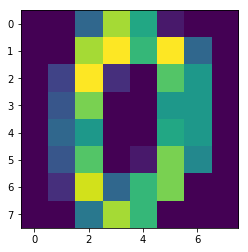

In [54]:
# 查看图像
plt.imshow(digits.images[0])
print(digits.target[0])

对原始数据集中的第一幅图进行可视化，我们可以看到图像时一8*8的像素矩阵，从上面这幅图像看出这是一个"0",从训练集的分类标注中我们也可以看到分类标注为"0"

sklearn自带的手写数字数据集一共包括了1797个样本，每幅图像都是8*8像素的矩阵。因为我们并没有专门的测试集，所以我们需要对数据集做划分，划分成测试集和训练集。因为KNN算法和距离定义相关，所以我们还需要对数据进行规范化处理，采用Z-Score规范化。

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 分割数据，将25%的数据作为测试集，其余作为训练集
train_x,test_x,train_y,test_y = train_test_split(data,labels,test_size=0.2,random_state=111)

# 采用Z-Score规范化
standardScaler = StandardScaler()
train_ss_x = standardScaler.fit_transform(train_x)
test_ss_x = standardScaler.transform(test_x)

然后我们构造一个KNN分类器，把训练集的数据传入构造好的knn，并通过测试集进行结果预测，与测试集的结果进行对比，得到knn分类器准确率

In [58]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(train_ss_x,train_y)
knn_clf.score(test_ss_x,test_y)

0.9694444444444444

###### Gird Search寻找最佳

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

digits = datasets.load_digits()
data = digits.data
labels = digits.target

x_train,x_test,y_train,y_test = train_test_split(data,labels,test_size=0.2,random_state=666)

param_grid=[
    {
        "weights":["uniform"],
        "n_neighbors":[i for i in range(1,11)]
    },
    {
        "weights":["distance"],
        "n_neighbors":[i for i in range(1,11)],
        "p":[i for i in range(1,6)]
    }
] 

knn_clf = KNeighborsClassifier()

UsageError: Line magic function `%%time` not found.


In [64]:
%%time
grid_search = GridSearchCV(knn_clf,param_grid,n_jobs=-1,verbose=2)
grid_search.fit(x_train,y_train)

D:\software\Anaconda\workplace\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   39.2s


Wall time: 50.6 s


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   50.5s finished


In [65]:
grid_search.best_params_

{'n_neighbors': 3, 'p': 3, 'weights': 'distance'}

In [67]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=3,
           weights='distance')

In [68]:
grid_search.best_score_

0.9853862212943633

### 总结

<img src="https://github.com/CodingChaozhang/MindMaster/blob/master/KNN%E7%AE%97%E6%B3%95.png?raw=true">